In [271]:
# Imports used the the project

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

from scipy.stats import pearsonr, norm, ttest_ind

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Wrangling

In [3]:
df_airports = pd.read_csv("Airports.csv")

In [4]:
print(type(df_airports["Fly_date"][0]))

<class 'numpy.int64'>


In [5]:
df_09 = df_airports[df_airports["Fly_date"]==200909]
df_10 = df_airports[df_airports["Fly_date"]==200910]
df_11 = df_airports[df_airports["Fly_date"]==200911]
df_12 = df_airports[df_airports["Fly_date"]==200912]

all_years_df = pd.concat([df_09, df_10, df_11, df_12], axis=0, ignore_index=True, sort=False)

In [6]:
la_df = all_years_df[all_years_df["Destination_city"] == "Los Angeles, CA"]
la_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
13678,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13679,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13680,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
...,...,...,...,...,...,...,...,...,...
67042,MSP,LAX,"Minneapolis, MN","Los Angeles, CA",...,1536,200912,3269814,25749594
67043,MSP,LAX,"Minneapolis, MN","Los Angeles, CA",...,1536,200912,3269814,25749594
67044,LAX,LAX,"Los Angeles, CA","Los Angeles, CA",...,0,200912,25749594,25749594


In [7]:
ny_df = all_years_df[all_years_df["Destination_city"] == "New York, NY"]
ny_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
7790,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7791,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7792,CMH,LGA,"Columbus, OH","New York, NY",...,478,200909,1801848,38139592
...,...,...,...,...,...,...,...,...,...
60557,PIT,LGA,"Pittsburgh, PA","New York, NY",...,335,200912,2354957,38139592
60558,PIT,JFK,"Pittsburgh, PA","New York, NY",...,340,200912,2354957,38139592
60559,PVD,LGA,"Providence, RI","New York, NY",...,143,200912,1600642,38139592


Los Angeles

In [8]:
ch_df = all_years_df[all_years_df["Destination_city"] == "Chicago, IL"]
ch_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
3227,MCI,MDW,"Kansas City, MO","Chicago, IL",...,405,200909,2067585,19161134
3228,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
3229,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
...,...,...,...,...,...,...,...,...,...
55862,SFO,ORD,"San Francisco, CA","Chicago, IL",...,1846,200912,8635706,19161134
55863,SFO,ORD,"San Francisco, CA","Chicago, IL",...,1846,200912,8635706,19161134
55864,IND,MDW,"Indianapolis, IN","Chicago, IL",...,162,200912,1743658,19161134


In [9]:
orl_df = all_years_df[all_years_df["Destination_city"] == "Orlando, FL"]
orl_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
5969,PBI,SFB,"West Palm Beach, FL","Orlando, FL",...,160,200909,5547051,2082421
5970,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
5971,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
...,...,...,...,...,...,...,...,...,...
58300,CLT,MCO,"Charlotte, NC","Orlando, FL",...,468,200912,1745524,2082421
58301,CLT,MCO,"Charlotte, NC","Orlando, FL",...,468,200912,1745524,2082421
58302,CLT,MCO,"Charlotte, NC","Orlando, FL",...,468,200912,1745524,2082421


In [10]:
sea_df = all_years_df[all_years_df["Destination_city"] == "Seattle, WA"]
sea_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
6785,LWS,SEA,"Lewiston, ID","Seattle, WA",...,261,200909,60643,6815696
6786,HNL,SEA,"Honolulu, HI","Seattle, WA",...,2677,200909,907574,6815696
6787,MSO,SEA,"Missoula, MT","Seattle, WA",...,389,200909,108623,6815696
...,...,...,...,...,...,...,...,...,...
59272,ORD,SEA,"Chicago, IL","Seattle, WA",...,1721,200912,19161134,6815696
59273,ORD,SEA,"Chicago, IL","Seattle, WA",...,1721,200912,19161134,6815696
59274,ELP,SEA,"El Paso, TX","Seattle, WA",...,1368,200912,751296,6815696


Sample Airport Datasets

In [11]:
la_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
13678,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13679,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13680,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13681,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13682,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594


In [12]:
sea_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
6785,LWS,SEA,"Lewiston, ID","Seattle, WA",...,261,200909,60643,6815696
6786,HNL,SEA,"Honolulu, HI","Seattle, WA",...,2677,200909,907574,6815696
6787,MSO,SEA,"Missoula, MT","Seattle, WA",...,389,200909,108623,6815696
6788,HNL,SEA,"Honolulu, HI","Seattle, WA",...,2677,200909,907574,6815696
6789,HNL,SEA,"Honolulu, HI","Seattle, WA",...,2677,200909,907574,6815696


In [13]:
ch_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
3227,MCI,MDW,"Kansas City, MO","Chicago, IL",...,405,200909,2067585,19161134
3228,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
3229,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
3230,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
3231,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134


In [14]:
ny_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
7790,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7791,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7792,CMH,LGA,"Columbus, OH","New York, NY",...,478,200909,1801848,38139592
7793,CMH,LGA,"Columbus, OH","New York, NY",...,478,200909,1801848,38139592
7794,BDL,JFK,"Hartford, CT","New York, NY",...,106,200909,1195998,38139592


In [15]:
orl_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
5969,PBI,SFB,"West Palm Beach, FL","Orlando, FL",...,160,200909,5547051,2082421
5970,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
5971,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
5972,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
5973,SLC,MCO,"Salt Lake City, UT","Orlando, FL",...,1929,200909,1130293,2082421


# DATA EXPLORATION

In [16]:
la_df['Origin_city'].value_counts()

San Francisco, CA    65
Anchorage, AK        65
Phoenix, AZ          62
                     ..
St. George, UT        1
Little Rock, AR       1
Pullman, WA           1
Name: Origin_city, Length: 98, dtype: int64

In [17]:
sea_df['Origin_city'].value_counts()

Portland, OR       50
Spokane, WA        50
Phoenix, AZ        47
                   ..
San Antonio, TX     1
Eureka, CA          1
El Paso, TX         1
Name: Origin_city, Length: 90, dtype: int64

In [18]:
ch_df['Origin_city'].value_counts()

Detroit, MI       103
Atlanta, GA       101
Anchorage, AK      99
                 ... 
Shreveport, LA      1
Alexandria, LA      1
Asheville, NC       1
Name: Origin_city, Length: 142, dtype: int64

In [19]:
ny_df['Origin_city'].value_counts()

Chicago, IL        108
Washington, DC     100
Boston, MA          66
                  ... 
Columbia, MO         1
Albuquerque, NM      1
El Paso, TX          1
Name: Origin_city, Length: 93, dtype: int64

In [20]:
orl_df['Origin_city'].value_counts()

Washington, DC      55
Philadelphia, PA    47
Houston, TX         45
                    ..
Myrtle Beach, SC     1
Savannah, GA         1
Hattiesburg, MS      1
Name: Origin_city, Length: 111, dtype: int64

# DATA ANALYSIS IDEAS

1. BAR CHART/HISTOGRAM FOR EACH CITY OVER 4 MONTHS
2. BAR CHART/HISTOGRAM FOR EACH MONTH ACROSS 5 CITIES
3. AVERAGE DISTANCE FOR EACH CITY AND OVERALL
4. MODEL WHICH CITY LIKELY WENT TO IF COMING FROM X
5. <b>RELATIONSHIP BETWEEN WEATHER FACTOR AND CHANGE IN BOOKED FLIGHTS</b>

Loading Weather Data

In [82]:
la_we = pd.read_csv("./WEATHERDATA/USEABLE DATA/LAX.csv")
sea_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/SEA.csv")
chi_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/CHI.csv")
nyc_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/NYC.csv")
orl_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/ORL.csv")

In [83]:
la_we = la_we.drop(columns = 'Unnamed: 0')
sea_we = sea_we.drop(columns = 'Unnamed: 0')
chi_we = chi_we.drop(columns = 'Unnamed: 0')
nyc_we = nyc_we.drop(columns = 'Unnamed: 0')
orl_we = orl_we.drop(columns = 'Unnamed: 0')

In [91]:
chi_we = chi_we.drop(columns = 'Unnamed: 0.1')

In [92]:
nyc_we = nyc_we.drop(columns = 'Unnamed: 0.1')

In [93]:
orl_we = orl_we.drop(columns = 'Unnamed: 0.1')

In [307]:
la_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
13678,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13679,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13680,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
...,...,...,...,...,...,...,...,...,...
67042,MSP,LAX,"Minneapolis, MN","Los Angeles, CA",...,1536,200912,3269814,25749594
67043,MSP,LAX,"Minneapolis, MN","Los Angeles, CA",...,1536,200912,3269814,25749594
67044,LAX,LAX,"Los Angeles, CA","Los Angeles, CA",...,0,200912,25749594,25749594


Looking at number of flights in each month

In [162]:
la_df['Fly_date'].value_counts()

200912    436
200911    390
200910    382
200909    354
Name: Fly_date, dtype: int64

Creating a dataframe for the 4 month interval with frequncy of flights and Temp+Humidity Conditions

In [193]:
la_fly_freq_data = [[9,354,57,59],[10,382,72,68],[11,390,67,62],[12,436,62,56]]
la_fly_freq = pd.DataFrame(la_fly_freq_data, columns = ['Date','Flights','Temp','Humidity'])
la_fly_freq

,Date,Flights,Temp,Humidity
0,9,354,57,59
1,10,382,72,68
2,11,390,67,62
3,12,436,62,56


Creating a dataframe for the 4 month duration with frequncy of flights and Temp+Humidity Conditions --  Change over time

In [203]:
la_fly_freq_data_change = [[9,0,0,0],[10,28,15,9],[11,8,-5,-6],[12,46,-5,-6]]
la_fly_freq_change = pd.DataFrame(la_fly_freq_data_change, columns = ['Date','Flights','Temp','Humidity'])
la_fly_freq_change

,Date,Flights,Temp,Humidity
0,9,0,0,0
1,10,28,15,9
2,11,8,-5,-6
3,12,46,-5,-6


In [359]:
sea_df['Fly_date'].value_counts()

200911    304
200909    303
200912    287
200910    274
Name: Fly_date, dtype: int64

In [361]:
sea_we

,Temperature (°F),Humidty (%),"Pressure (""Hg"")"
0,38,74,30.08
1,63,68,30.04
2,53,75,30.02
3,47,79,30.01


In [365]:
sea_fly_freq_data = [[9,303,38,74],[10,274,63,68],[11,304,53,75],[12,287,47,79]]
sea_fly_freq = pd.DataFrame(sea_fly_freq_data, columns = ['Date','Flights','Temp','Humidity'])
sea_fly_freq

,Date,Flights,Temp,Humidity
0,9,303,38,74
1,10,274,63,68
2,11,304,53,75
3,12,287,47,79


# GRAPHS 

In [358]:
# run model
outcome, predictors = patsy.dmatrices('Temp ~ Flights', la_fly_freq)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.469
Method:                 Least Squares   F-statistic:                   0.04244
Date:                Fri, 07 Jun 2019   Prob (F-statistic):              0.856
Time:                        17:24:40   Log-Likelihood:                -12.518
No. Observations:                   4   AIC:                             29.04
Df Residuals:                       2   BIC:                             27.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8245     51.971      1.036      0.4

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [368]:
# run model
outcome, predictors = patsy.dmatrices('Flights ~ Temp', sea_fly_freq)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Flights   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1.911
Date:                Fri, 07 Jun 2019   Prob (F-statistic):              0.301
Time:                        17:31:18   Log-Likelihood:                -14.402
No. Observations:                   4   AIC:                             32.80
Df Residuals:                       2   BIC:                             31.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    339.8571     35.183      9.660      0.0

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


This graph shows the change in Flights made to Los Angeles as well as the Temperature and Humidity of LA over Sep.2009-Dec.2009. Even though this is discrete data, the change over time is important and better viewed as a line plot rather than bar plot.

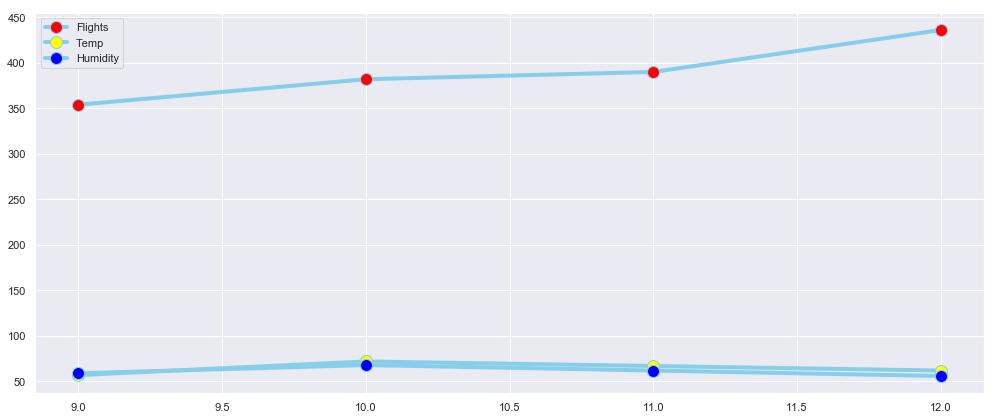

In [239]:
# multiple line plot
plt.plot( 'Date', 'Flights', data=la_fly_freq, marker='o', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Temp', data=la_fly_freq, marker='o', markerfacecolor='yellow', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Humidity', data=la_fly_freq, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.legend()

This is a barplot that shows the <b>change</b> in both temperature and flights over the 4 month duration in Los Angeles. Note that the y axis goes below zero because temperature went down in Novemeber and December while flights went up each month, but by varying amounts (especially the deceleration in November but great acceleration in December).

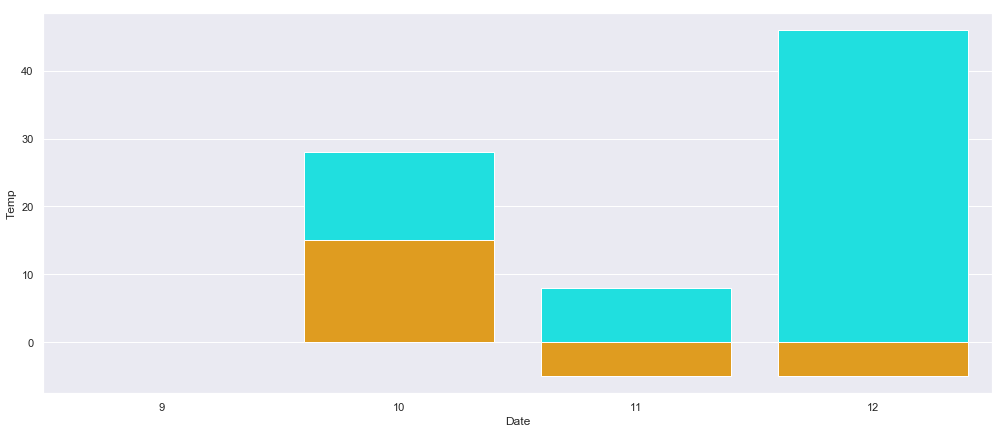

In [227]:
sns.barplot(data=la_fly_freq_change, x='Date', y='Flights',color = 'cyan')
sns.barplot(data=la_fly_freq_change, x='Date', y='Temp', color = 'orange')
#sns.barplot(data=la_fly_freq_change, x='Date', y='Humidity', color = 'purple')

This is simply a line plot of weather conditions over the 4 month duration in Los Angeles. Because the changes in Pressure are so small, we chose to eliminate Pressure as a weather factor for any analysis.

In [325]:
la_we

,Temperature (°F),Humidty (%),"Pressure (""Hg"")"
0,57,59,30.03
1,72,68,29.88
2,67,62,29.92
3,62,56,29.96


These are scatterplots for the distances traveled to each Destination City for each month. We addeda small amount of jitter to the distribution so that density could be better observed. 

Los Angeles -- looks fairly consisent across distances. Los Angeles is a very popular international tourist destination and is known for enjoyable weather.

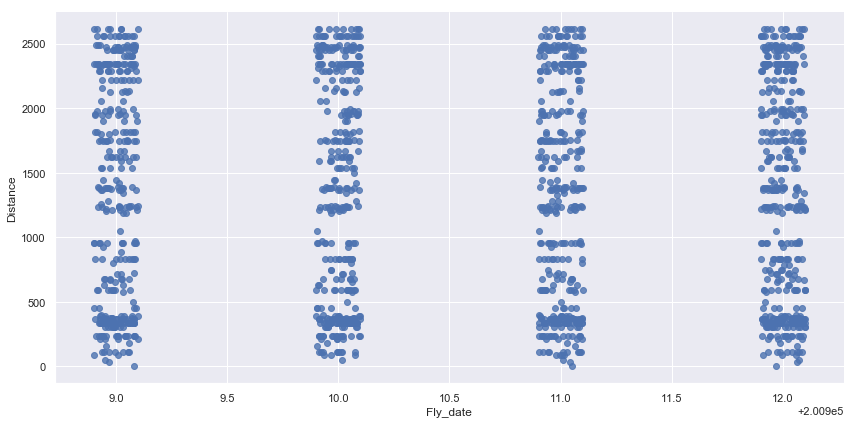

In [334]:
sns.lmplot(x='Fly_date', y='Distance', data=la_df, 
           fit_reg=False, height=6, aspect=2, x_jitter = 0.1)

Seattle -- Looks reasonably consistent across distances but a noticeable drop off in far distances. The most popular origin city was Portland, so it may be a good argument that international trips to Seattle are much less common than domestic.

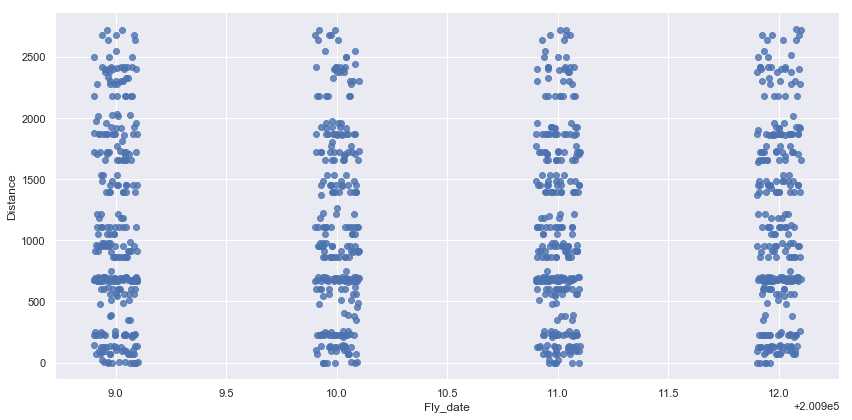

In [216]:
sns.lmplot(x='Fly_date', y='Distance', data=sea_df, 
           fit_reg=False, height=6, aspect=2,x_jitter = 0.1)

Chicago -- very noticeably, few flights were made to Chicago from far distances. A few flights from Hawaii look like outliers in the data, but flights from Anchorage made up the third highest amount of flights to Chicago.

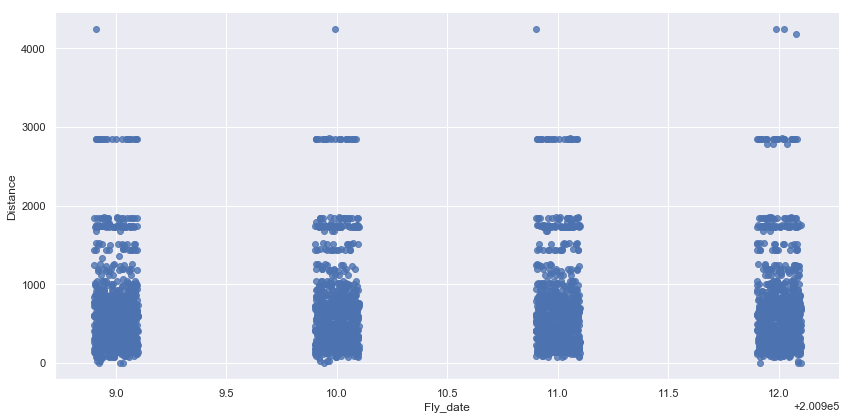

In [241]:
sns.lmplot(x='Fly_date', y='Distance', data=ch_df, 
           fit_reg=False, height=6, aspect=2,x_jitter = 0.1)

New York City -- a clear high density of domestic flights, but noticeably more international flights than Chicago. It looks like there are certain sweet spots in the higher distances that may be popular regions to leave for New York City.  

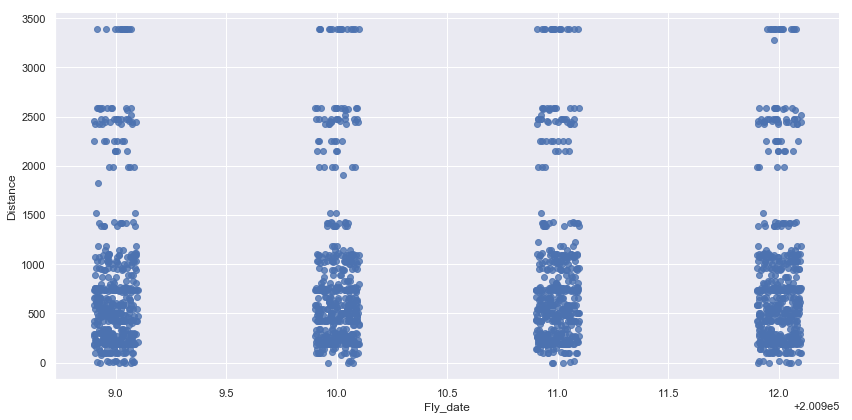

In [226]:
sns.lmplot(x='Fly_date', y='Distance', data=ny_df, 
           fit_reg=False, height=6, aspect=2,x_jitter = 0.1)
sns.lmplot?

Orlando -- it looks like there is a sweet spot somewhere around 500 and ~1300 miles. Orlando is a more popular destination for regional flights than cross country?

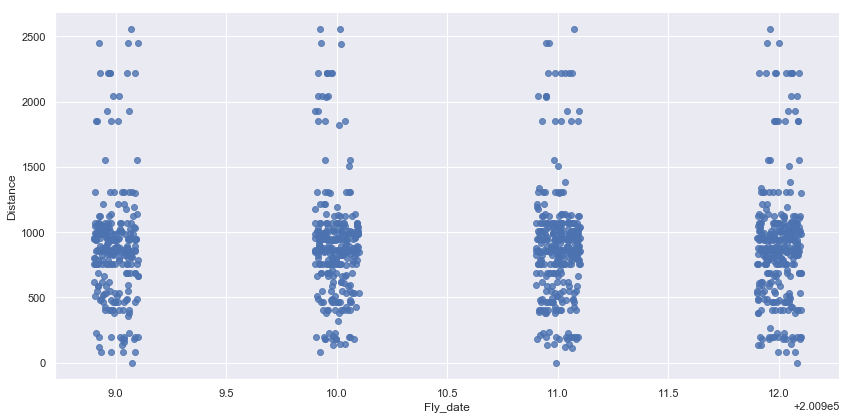

In [219]:
sns.lmplot(x='Fly_date', y='Distance', data=orl_df, 
           fit_reg=False, height=6, aspect=2,x_jitter = 0.1)

In [255]:
orl_df['Origin_city'].loc[orl_df['Distance'] > 1500].value_counts()

Los Angeles, CA       28
Phoenix, AZ           20
Las Vegas, NV         12
                      ..
Salt Lake City, UT     8
Seattle, WA            5
Fargo, ND              3
Name: Origin_city, Length: 8, dtype: int64

In [256]:
orl_df['Origin_city'].loc[orl_df['Distance'] < 1500].value_counts()

Washington, DC       55
Philadelphia, PA     47
Houston, TX          45
                     ..
Oklahoma City, OK     1
Savannah, GA          1
Hattiesburg, MS       1
Name: Origin_city, Length: 103, dtype: int64

Looks like the west coast travels far less to Orlando in this time period than the rest of the country.